Dataset 'student_performance_dataset.csv' loaded successfully.

Original Data Head:
  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Maste

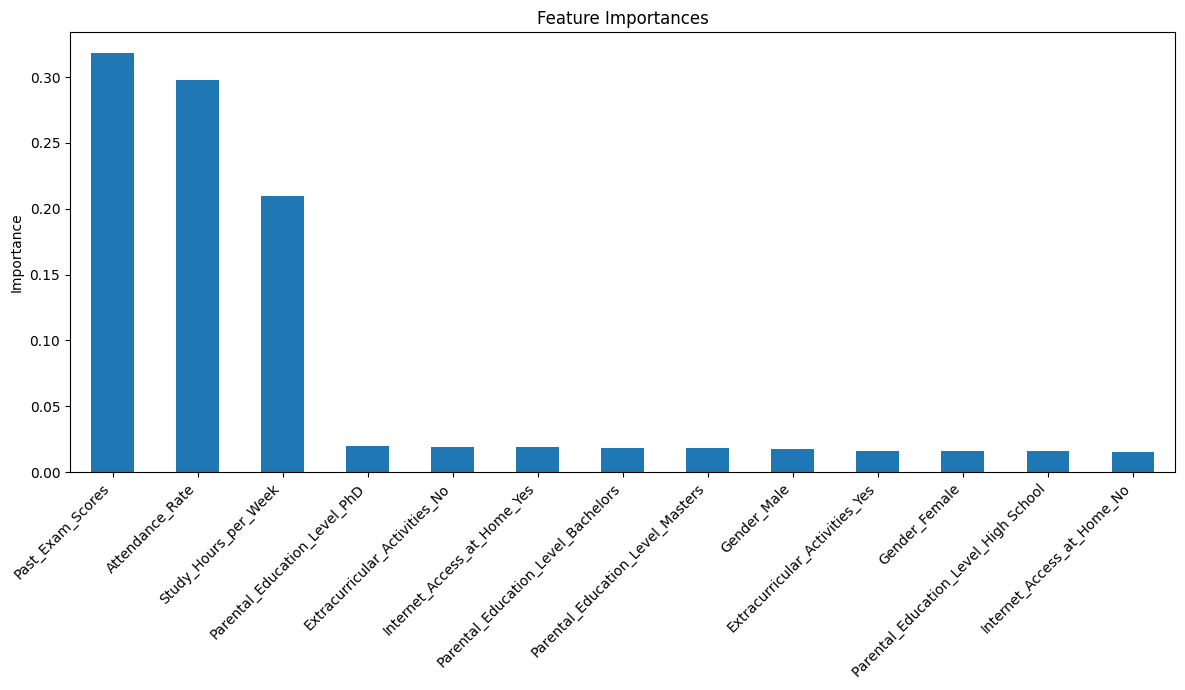


Feature importances saved as student_performance_feature_importances.kpl

Trained pipeline saved as student_performance_pipeline.kpl
Original feature names saved as student_performance_original_features.kpl
LabelEncoder saved as student_performance_label_encoder.kpl

Model Evaluation on Test Set:
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

        Fail       0.97      0.79      0.87        71
        Pass       0.82      0.97      0.89        71

    accuracy                           0.88       142
   macro avg       0.89      0.88      0.88       142
weighted avg       0.89      0.88      0.88       142


Confusion Matrix:
[[56 15]
 [ 2 69]]


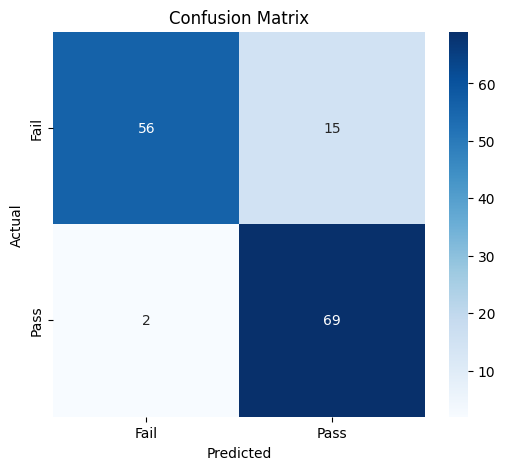

In [3]:
# Project2_Group17

# Group Member Student IDs and Names:
# 6531501204 - Aung Phyo Linn
# 6531501217 - Khant Zay Lin
# 6531501218 - Khun Min Khant Zaw
# 6531501231 - Taryar Thaw Zin
# 6531501237 - Zwe Lulin Maung

# Project Name: EduPredict: Student Pass/Fail Predictor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_name = 'student_performance_dataset.csv'
try:
    df = pd.read_csv(file_name)
    print(f"Dataset '{file_name}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: '{file_name}' not found.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")


if 'df' in locals(): # Proceed only if the dataframe was loaded successfully

    print("\nOriginal Data Head:")
    print(df.head())

    print("\nOriginal Data Info:")
    df.info()

    print("\nOriginal Data Description:")
    print(df.describe(include='all')) # Include all to see categorical descriptions

    # Check the unique values in categorical columns
    print("\nUnique values in categorical columns:")
    for col in ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']:
        if col in df.columns:
            print(f"- {col}: {df[col].unique()}")

    # 2. Identify features (X) and the target variable (y)
    # Target is 'Pass_Fail'. Features are all other relevant columns.
    # Drop 'Student_ID' and 'Final_Exam_Score' as they are not used as input features for Pass/Fail prediction.
    X = df.drop(['Student_ID', 'Final_Exam_Score', 'Pass_Fail'], axis=1)
    y = df['Pass_Fail']

    print("\nFeatures (X) Head:")
    print(X.head())
    print("\nTarget (y) Head:")
    print(y.head())

    # 3. Preprocess the data
    # Identify categorical and numerical features
    categorical_features = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
    numerical_features = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores']

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep other columns (none in this case)
    )

    # Encode the target variable (Label Encoding for Pass/Fail)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    print("\nClasses mapped by LabelEncoder for Pass/Fail:")
    # This shows the mapping (e.g., ['Fail', 'Pass']) - the order depends on the data
    print(label_encoder.classes_)


    # 4. Create a preprocessing and model pipeline
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    # 5. Split data into training and testing sets
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")


    # 6. Train the model pipeline
    model_pipeline.fit(X_train, y_train_encoded)

    print("\nModel pipeline trained.")





    # Get feature names from one-hot encoder
    onehot_features = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    # Combine numerical feature names and one-hot encoded feature names
    all_feature_names = numerical_features + list(onehot_features)

    if hasattr(model_pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_importances = pd.Series(model_pipeline.named_steps['classifier'].feature_importances_, index=all_feature_names)
        feature_importances_sorted = feature_importances.sort_values(ascending=False)

        print("\nFeature Importances:")
        print(feature_importances_sorted)

        # Optional: Visualize Feature Importances
        plt.figure(figsize=(12, 7))
        feature_importances_sorted.plot(kind='bar')
        plt.title('Feature Importances')
        plt.ylabel('Importance')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Save Feature Importances
        feature_importances_filename = 'student_performance_feature_importances.kpl'
        joblib.dump(feature_importances_sorted, feature_importances_filename)
        print(f"\nFeature importances saved as {feature_importances_filename}")


    # 9. Save the trained pipeline, feature names, and label encoder with .kpl extension
    pipeline_filename = 'student_performance_pipeline.kpl'
    joblib.dump(model_pipeline, pipeline_filename)
    print(f"\nTrained pipeline saved as {pipeline_filename}")

    # Save the original feature names before preprocessing (useful for Streamlit input creation)
    original_features_filename = 'student_performance_original_features.kpl'
    joblib.dump(X.columns.tolist(), original_features_filename)
    print(f"Original feature names saved as {original_features_filename}")

    label_encoder_filename = 'student_performance_label_encoder.kpl'
    joblib.dump(label_encoder, label_encoder_filename)
    print(f"LabelEncoder saved as {label_encoder_filename}")

     # 7. Evaluate the model
    y_pred_encoded = model_pipeline.predict(X_test)

    print("\nModel Evaluation on Test Set:")
    # Accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    print(f"Accuracy: {accuracy:.2f}")

    # Classification Report (Precision, Recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test_encoded, y_pred_encoded)
    print("\nConfusion Matrix:")
    print(cm)

    # Optional: Visualize Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


else:
    print("\nDataframe was not loaded. Please resolve the file loading error before proceeding.")